In [2]:
##import library yang dibutuhkan 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
#impport data 
df=pd.read_csv('/content/emails.csv')

In [10]:
# tampilkan data
df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Columns: 3002 entries, Email No. to Prediction
dtypes: float64(1345), int64(1656), object(1)
memory usage: 11.9+ MB


In [6]:
#Pengecekan data null dan NA
df.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      1
allowing      1
ff            1
dry           1
Prediction    1
Length: 3002, dtype: int64

In [7]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      1
allowing      1
ff            1
dry           1
Prediction    1
Length: 3002, dtype: int64

In [29]:
# Fill missing values with 0
df.fillna(0, inplace=True)

In [30]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,...,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,7.146718,6.376448,4.945946,3.111969,3.519305,2.660232,56.660232,2.629344,1.874517,10.947876,...,0.005792,0.009653,0.003861,0.077220,0.009653,0.001931,0.019305,1.048263,0.007722,0.260618
std,13.834113,10.250215,9.467698,7.048534,5.122353,6.030901,88.117670,4.798217,4.519642,20.090395,...,0.098171,0.145545,0.062077,0.487585,0.145545,0.043937,0.174855,5.332611,0.087620,0.439396
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,14.250000,0.000000,0.000000,1.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,3.000000,58.000000,3.000000,1.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,111.000000,92.000000,83.000000,39.000000,77.000000,951.000000,42.000000,38.000000,223.000000,...,2.000000,3.000000,1.000000,6.000000,3.000000,1.000000,3.000000,114.000000,1.000000,1.000000


In [31]:

# pengecekan data yang duplikat 
df.duplicated().sum()

0

In [32]:
# memisahkan data x dan y
x_data=df.drop(columns=['Email No.','Prediction'])
y_data=df['Prediction']

In [33]:
#split data training dan testing 
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)
trainX.shape, testX.shape, trainY.shape, testY.shape

((414, 3000), (104, 3000), (414,), (104,))

Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

# buat Logistic Regression model dengan LogisticRegression
clf = LogisticRegression(max_iter=500000)
print(clf.get_params())
# Train model
clf.fit(trainX, trainY)
print(f"Model weights: {clf.coef_}, bias: {clf.intercept_}")

# test
y_pred = clf.predict(testX)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Model weights: [[0.03918142 0.53089281 0.07175298 ... 0.00082692 0.24799005 0.00381988]], bias: [0.13278532]


[[82  1]
 [ 4 17]]


Text(0.5, 427.9555555555555, 'Predicted label')

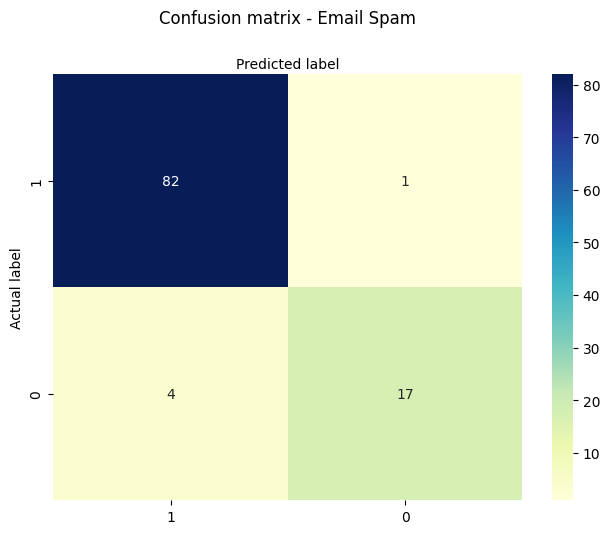

In [38]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred)
print(cnf_matrix)

class_names=['1','0'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
# accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred))
print("Precision:", metrics.precision_score(testY, y_pred))
print("Recall:", metrics.recall_score(testY, y_pred))

Accuracy: 0.9519230769230769
Precision: 0.9444444444444444
Recall: 0.8095238095238095


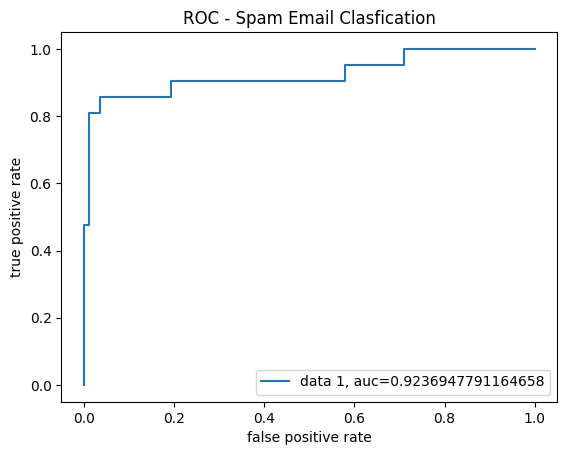

In [43]:
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_proba)
auc = metrics.roc_auc_score(testY, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Spam Email Clasfication')
plt.legend(loc=4)
plt.show()